### Metodos númericos. Simulaciones de Monte Carlo.

Veremos más ejemplos de aplicación y terminaremos con el desafio.

#### 1) El problema de la aguja de Buffon:

Un noble francés, Georges-Louis Leclerc, Conde de Buffon, planteó el siguiente problema en 1777.

Supongamos que dejamos caer una aguja corta sobre un papel rayado — ¿cuál sería la probabilidad de que la aguja quede en una posición donde cruce una de las líneas?

La probabilidad depende de la distancia (d) entre las líneas del papel rayado, y depende de la longitud (l) de la aguja que dejamos caer — o más bien, depende de la relación l/d. Para este ejemplo, podemos interpretar la aguja como l ≤ d. En resumen, nuestro propósito es que la aguja no pueda cruzar dos líneas diferentes al mismo tiempo. Sorprendentemente, la respuesta al problema de la aguja de Buffon involucra $\pi$.

Aquí vamos a usar la solución del problema de la aguja de Buffon para estimar el valor de PI experimentalmente usando el Método de Monte Carlo. Más información en https://es.wikipedia.org/wiki/Aguja_de_Buffon

#### Estimación de PI usando el problema de la aguja de Buffon:

A continuación, vamos a usar la fórmula anterior para encontrar el valor de $\pi$ experimentalmente.

$$ \pi = \frac{2 l}{P d} $$

Ahora, observa que tenemos los valores de $l$ (largo de la aguja) y $d$ (distancia entre lineas). Nuestro objetivo es encontrar el valor de $P$ primero para que podamos obtener el valor de $\pi$. Para encontrar la probabilidad $P$, debemos contar las agujas que cruzan las líneas y las agujas totales. Dado que ya tenemos el conteo total de agujas, lo único que necesitamos ahora es contar las agujas que cruzan las líneas.

A continuación se muestra la representación visual de cómo vamos a calcular el conteo de agujas que cruzan las líneas.

Promedio de los valores de PI: 3.141207047360309


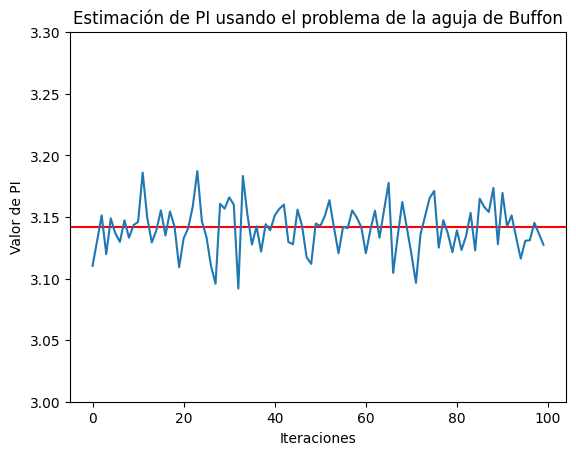

In [4]:
# Importar las bibliotecas requeridas
import random
import math
import matplotlib.pyplot as plt

# Función principal
def monte_carlo(runs, needles, n_length, b_width):
    # Lista vacía para almacenar los valores de pi
    pi_values = []

    # Línea horizontal para el valor actual de PI
    plt.axhline(y=math.pi, color='r', linestyle='-')

    # Para todas las ejecuciones:
    for i in range(runs):
        # Inicializar el número de aciertos en 0
        nhits = 0

        # Para todas las agujas:
        for j in range(needles):
            # Encontraremos la distancia desde la línea vertical más cercana
            # Mínimo = 0, Máximo = b_width/2
            x = random.uniform(0, b_width / 2)

            # El valor de theta será de 0 a pi/2
            theta = random.uniform(0, math.pi / 2)

            # Comprobando si la aguja cruza la línea o no
            xtip = x - (n_length / 2.0) * math.cos(theta)
            if xtip < 0:
                nhits += 1

        # Aplicando la fórmula
        numerator = 2.0 * n_length * needles
        denominator = b_width * nhits

        # Añadiendo el valor final de pi
        pi_values.append((numerator / denominator))

    # Promedio de los valores de pi
    average_pi = sum(pi_values) / len(pi_values)
    print("Promedio de los valores de PI:", average_pi)

    # Graficar los valores de pi
    plt.plot(pi_values)
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor de PI')
    plt.title('Estimación de PI usando el problema de la aguja de Buffon')
    plt.ylim(3, 3.3)
    plt.show()

# Ejemplo de uso
monte_carlo(runs=100, needles=100000, n_length=2.0, b_width=6.0)

#### 2. Otro ejemplo área bajo la curva

$$ I = \int_{0}^{\pi} sin(x) dx$$

#### Procedimiento:
1. Genera $n$ puntos aleatorios $(x, y)$ donde $0 \leq x \leq \pi$ y $0 \leq y \leq 1$.
2. Calcula cuántos puntos caen por debajo de la curva $y = \sin(x)$.
3. Estima el área bajo la curva usando la fórmula:

$$ \text{Área estimada} = \frac{\text{Número de puntos debajo de la curva}}{\text{Número total de puntos}} \times \text{Área del rectángulo} $$

donde el área del rectángulo es $\pi \times 1$. El resultado teórico de la integral es $2$.

Área estimada bajo la curva y = sin(x) en el intervalo [0, π]: 1.9817166458844415


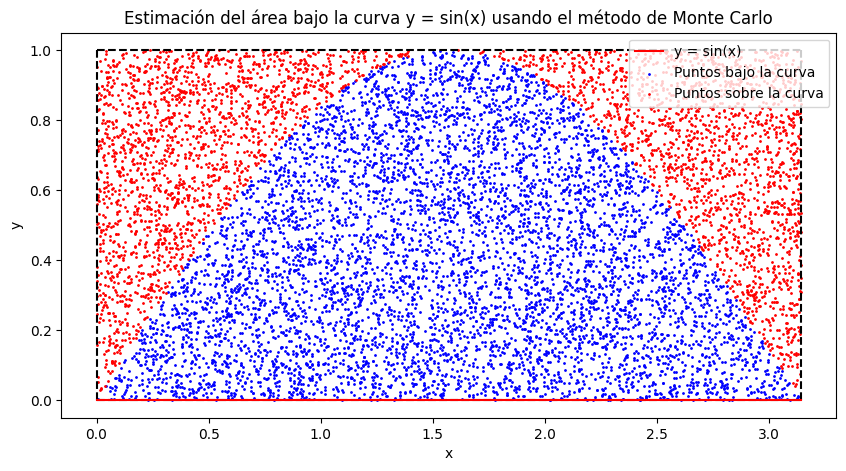

In [2]:
import random
import math
import matplotlib.pyplot as plt

def monte_carlo_integration(runs):
    # Número de puntos debajo de la curva
    n_under_curve = 0

    # Generar puntos aleatorios y contar cuántos caen debajo de la curva y = sin(x)
    for _ in range(runs):
        x = random.uniform(0, math.pi)
        y = random.uniform(0, 1)

        if y <= math.sin(x):
            n_under_curve += 1

    # Estimar el área bajo la curva
    area_rect = math.pi * 1  # Área del rectángulo delimitador
    estimated_area = (n_under_curve / runs) * area_rect

    return estimated_area

# Número de puntos a generar
runs = 10000
estimated_area = monte_carlo_integration(runs)
print(f"Área estimada bajo la curva y = sin(x) en el intervalo [0, π]: {estimated_area}")

# Graficar la función y = sin(x) y los puntos generados
x_values = [random.uniform(0, math.pi) for _ in range(runs)]
y_values = [random.uniform(0, 1) for _ in range(runs)]
under_curve_x = [x for x, y in zip(x_values, y_values) if y <= math.sin(x)]
under_curve_y = [y for x, y in zip(x_values, y_values) if y <= math.sin(x)]

plt.figure(figsize=(10, 5))
plt.plot([0, math.pi], [1, 1], 'k--')
plt.plot([0, math.pi], [0, 0], 'k--')
plt.plot([0, 0], [0, 1], 'k--')
plt.plot([math.pi, math.pi], [0, 1], 'k--')
plt.plot([0, math.pi], [math.sin(0), math.sin(math.pi)], 'r', label='y = sin(x)')
plt.scatter(under_curve_x, under_curve_y, s=1, color='blue', label='Puntos bajo la curva')
plt.scatter([x for x, y in zip(x_values, y_values) if y > math.sin(x)], [y for x, y in zip(x_values, y_values) if y > math.sin(x)], s=1, color='red', label='Puntos sobre la curva')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Estimación del área bajo la curva y = sin(x) usando el método de Monte Carlo')
plt.legend()
plt.show()

#### 3. Estimación de la Integral Impropia usando el Método de Monte Carlo

En este ejercicio, vamos a estimar el valor de la integral impropia de $e^{-x^2}$ en el intervalo $[0, \infty)$ utilizando el método de Monte Carlo y el Teorema del Valor Medio para Integrales.

##### Problema:
Estimaremos el valor de la integral impropia de $e^{-x^2}$ en el intervalo $[0, \infty)$.

##### Enfoque:
1. Generamos un número grande de puntos aleatorios $x$ en el intervalo $[0, b]$ donde $b$ es un valor grande que aproxima $\infty$.
2. Calculamos los valores correspondientes de $e^{-x^2}$.
3. Utilizamos el Teorema del Valor Medio para Integrales para estimar la integral.

##### Procedimiento:
1. Genera $n$ puntos aleatorios $x$ donde $0 \leq x \leq b$.
2. Calcula los valores correspondientes de $e^{-x^2}$ para cada $x$.
3. Estima la integral usando la fórmula:

$$ \int_{0}^{\infty} e^{-x^2} \, dx \approx \frac{b - 0}{n} \sum_{i=1}^{n} e^{-x_i^2} $$

donde $b$ es un valor grande que aproxima $\infty$ y $n$ es el número de puntos generados.

Estimación de la integral de e^(-x^2) en el intervalo [0, ∞]: 0.8767782935563885


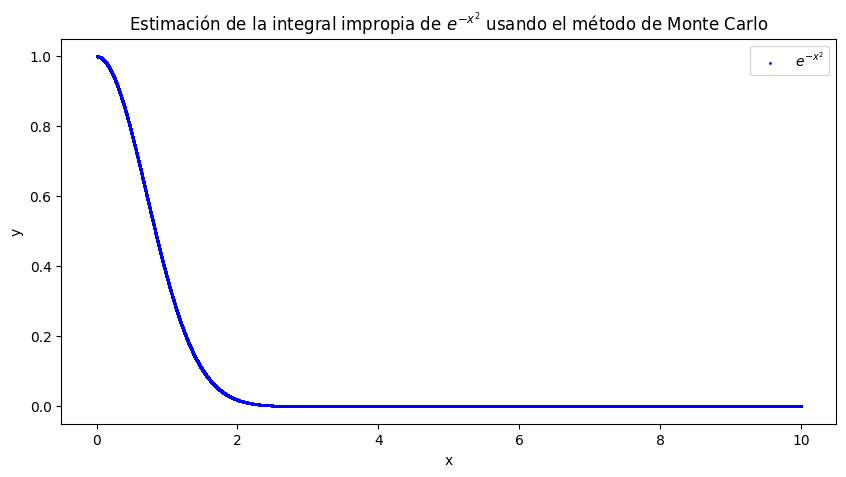

In [4]:
import random
import math
import matplotlib.pyplot as plt

def monte_carlo_integration_improper(runs, b):
    # Suma de los valores de la función
    sum_f = 0

    # Generar puntos aleatorios y calcular la función e^{-x^2}
    for _ in range(runs):
        x = random.uniform(0, b)
        sum_f += math.exp(-x**2)

    # Estimar la integral
    integral_estimation = (b / runs) * sum_f

    return integral_estimation

# Número de puntos a generar y valor grande para aproximar infinito
runs = 100000
b = 10  # Asegúrate de que b sea suficientemente grande para aproximar la integral impropia
estimated_integral = monte_carlo_integration_improper(runs, b)
print(f"Estimación de la integral de e^(-x^2) en el intervalo [0, ∞]: {estimated_integral}")

# Graficar la función e^{-x^2} y los puntos generados
x_values = [random.uniform(0, b) for _ in range(runs)]
y_values = [math.exp(-x**2) for x in x_values]

plt.figure(figsize=(10, 5))
plt.scatter(x_values, y_values, s=1, color='blue', label='$e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Estimación de la integral impropia de $e^{-x^2}$ usando el método de Monte Carlo')
plt.legend()
plt.show()

In [5]:
import sympy
x = sympy.Symbol('x')
res = sympy.Integral(sympy.exp(-x*x), (x, 0, sympy.oo))
res

Integral(exp(-x**2), (x, 0, oo))

In [6]:
res.doit()

sqrt(pi)/2

In [7]:
res.evalf()

0.886226925452758

### Ahora el desafio semanal.

Recuerde informe y acostumbrese a medir tiempos (aunque en este caso poco sirve). Realice conclusiones, si el modelo sirve o no, si comprará la acción o irá al casino.

#### 1. Simulación de Montecarlo aplicado a acciones SP500.

a. Elegir una acción del SP500, que le parezca interesante. https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

b. Encontrar y tabular la estimación de los analistas del precio de las acción electa. https://www.tipranks.com/stocks/nvda/forecast (ticker va antes de forecast)

c. Descargue los precios de la accion utilizando Yahoo Finance. https://pypi.org/project/yfinance

d. Defina un periodo de tiempo (puede ser un parametro), y calcule la rentabilidad de cada dia y agrupela por mes.

e. Aleatoriamente seleccione rentabilidades dentro grupo mensual, y asuma que cada dia futuro sucede esa rentabilidad (dentro del mismo mes). Realice 1000 simulaciones y calcule el porcentaje de simulaciones que quedan dentro del rango de los analistas.

#### 2. La ruleta.

Estudie como se juega la ruleta en el casino. https://www.casino.es/ruleta/como-jugar-ruleta/

Suponga que usted va cada día del año al casino (365 veces), usted cuenta con un presupuesto de 200 mil pesos diarios y por sesión alcanza a jugar como máximo 100 veces, pues se retira a la apuesta número 100 o cuando queda sin dinero. Usted solo realiza una apuesta, al **impar**, y comienza apostando mil pesos, en cualquier juego, en caso de ganar algún juego vuelve al comienzo y apuesta mil pesos, en caso de perder, dobla la apuesta, en el caso que no tenga suficiente dinero, apueste todo lo que queda.

Calcule 100 escenarios distintos y grafique el dinero ganado o perdido en cada posible escenario.

#### 3. Integral impropia con teorema del valor medio.

Calcular 9.3.2

Revisar en https://www.fing.edu.uy/~eleonora/Recopilacion/Archivos/NotasEnsenanza/FuncionesVariableCompleja/Cauchy9.pdf

